# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="bricks.jpg" />

# Import Statements

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.}

In [17]:
colors_df = pd.read_csv("./data/colors.csv")
unique_items_total = colors_df.nunique()
unique_items_total

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [23]:
colors_df.head()
colors_df["is_trans"]

0      f
1      f
2      f
3      f
4      f
      ..
130    t
131    t
132    t
133    f
134    f
Name: is_trans, Length: 135, dtype: object

In [22]:
unique_colors = colors_df["name"].nunique()
print(f"Unique colors: {unique_colors}")

Unique colors: 135


TypeError: object of type 'generator' has no len()

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [26]:
# 1st way
counts = colors_df["is_trans"].value_counts()
transparent = counts.get('t', 0)
opaque = counts.get('f', 0)

print("Transparent:", transparent)
print("Opaque:", opaque)

Transparent: 28
Opaque: 107


In [27]:
# 2nd way
transparent = (colors_df["is_trans"] == "t").sum()
opaque = (colors_df["is_trans"] == "t").sum()
print("Transparent:", transparent)
print("Opaque:", opaque)

Transparent: 28
Opaque: 28


In [29]:
# 3rd way
trans = colors_df.groupby("is_trans").count()
trans

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [30]:
# 4th way
trans = colors_df["is_trans"].value_counts()
trans

is_trans
f    107
t     28
Name: count, dtype: int64

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

### Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="https://i.imgur.com/aKcwkSx.png" />
**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 
<img src="https://i.imgur.com/whB1olq.png " />

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [32]:
sets_df = pd.read_csv("./data/sets.csv")
sets_df.head()


,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [33]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [34]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [38]:
first_year = sets_df["year"].min()
name_of_first_set = sets_df[sets_df["year"] == first_year]["name"].iloc[0]
print(f"The first LEGO sets were released in {first_year} and they were called {name_of_first_set}")

The first LEGO sets were released in 1949 and they were called Extra-Large Gift Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [51]:
sets_per_year = sets_df["year"].value_counts()
# sets_per_year
total_sales_first_year = sets_df[sets_df["year"] == first_year]["theme_id"].sum()
print(total_sales_first_year)
# total_sales_first_year = len(sets_df[sets_df["year"] == first_year])
# print(total_sales_first_year)

sets_first_year = sets_df[sets_df["year"] == first_year]
print(sets_first_year.count())
print(sets_first_year["theme_id"].count())
print()


1837
set_num      5
name         5
year         5
theme_id     5
num_parts    5
dtype: int64
5


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [61]:
most_number_of_parts = sets_df["num_parts"].sort_values(ascending=False).head(5)
# most_number_of_parts_top_5 = most_number_of_parts[::5]
print(most_number_of_parts)

15004    9987
11183    7541
10551    6020
295      5923
221      5922
Name: num_parts, dtype: int64


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [66]:
per_year = sets_df.groupby("year").count()
released_in_1955 = per_year.loc[1955, "name"] if 1955 in per_year.index else 0
released_in_1955

np.int64(28)

In [67]:
released_in_2019 = per_year.loc[2019, "name"] if 2019 in per_year.index else 0
released_in_2019

np.int64(840)

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

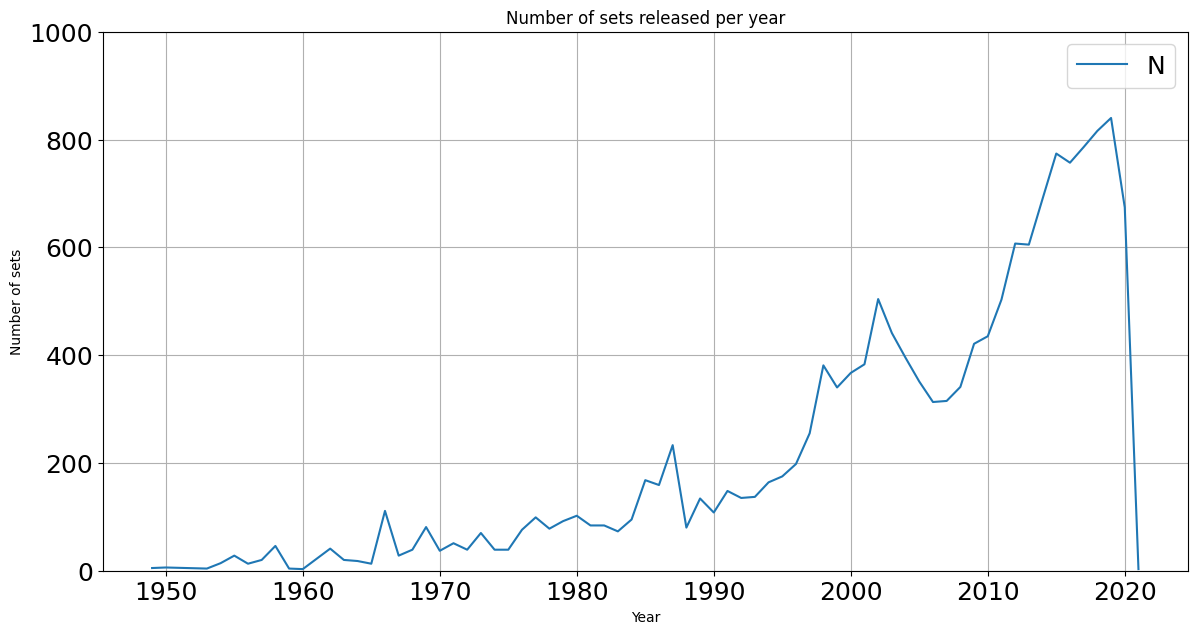

In [83]:
plt.figure(figsize=(14,7))
plt.title("Number of sets released per year")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Number of sets")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 1000)
plt.plot(per_year.index, per_year["set_num"])
plt.legend("Number of sets", fontsize=18)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [84]:
themes_by_year = sets_df.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


In [86]:
# give columns appropriate names
themes_by_year.rename(columns={"theme_id": "nr_themes"}, inplace=True)
themes_by_year.head()
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

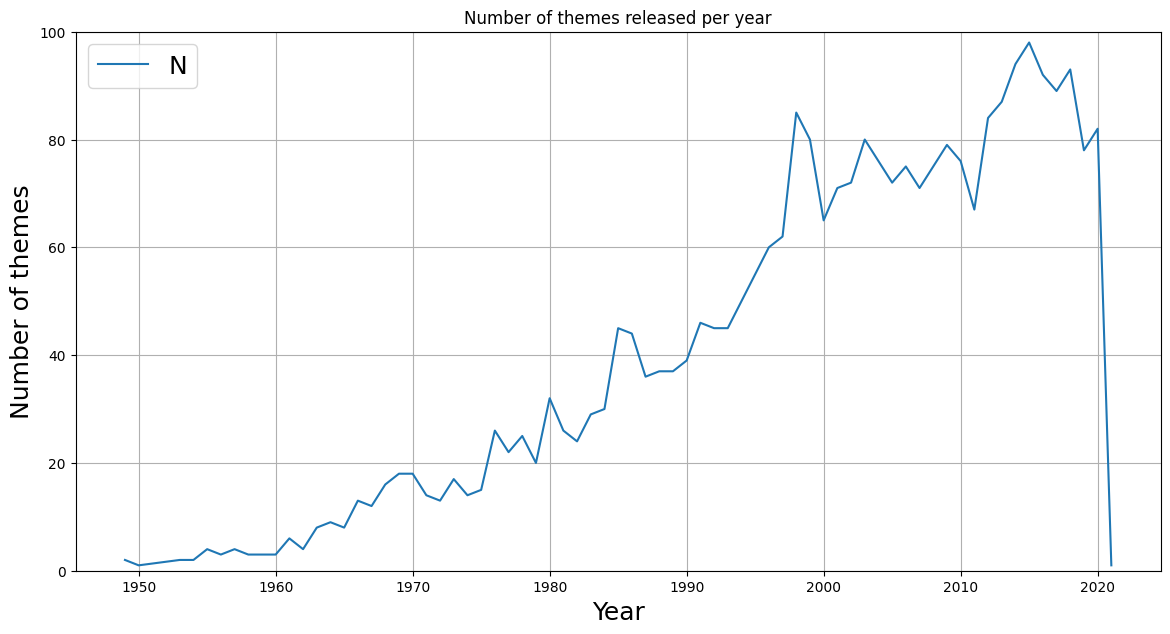

In [87]:
plt.figure(figsize=(14, 7))
plt.title("Number of themes released per year")
plt.grid()
plt.xlabel("Year", fontsize=18)
plt.ylabel("Number of themes", fontsize=18)
plt.ylim(0, 100)
plt.plot(themes_by_year.index, themes_by_year["nr_themes"])
plt.legend("Number of themes", fontsize=18)

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of sets')

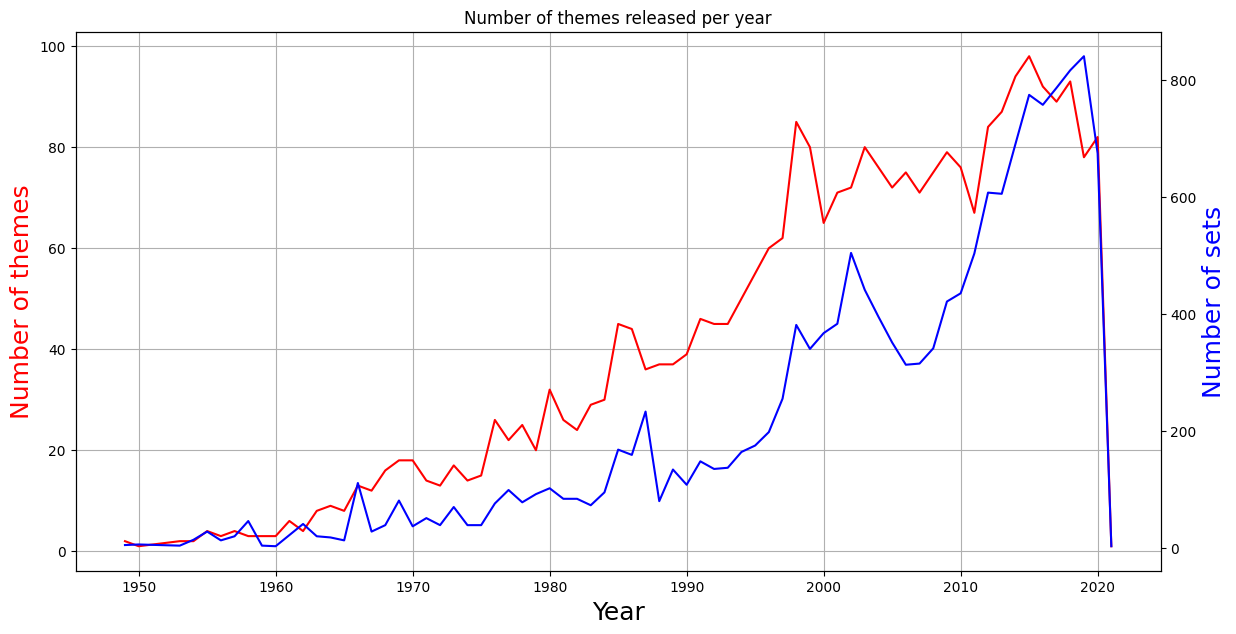

In [95]:
plt.figure(figsize=(14, 7))
plt.title("Number of themes released per year")
plt.grid()
# we need 2 different axes for the two different y-axes
ax1 = plt.gca()
ax2 = plt.gca().twinx()
ax1.plot(themes_by_year.index, themes_by_year["nr_themes"], color="red")
ax2.plot(per_year.index, per_year["set_num"], color="blue")
ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("Number of themes", fontsize=18, color="red")
ax2.set_ylabel("Number of sets", fontsize=18, color="blue")
# plt.legend("Number of themes", fontsize=18)       

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [99]:
avg_sets = sets_df.groupby("year").agg({"num_parts":pd.Series.nunique})
avg_sets.rename(columns={"num_parts": "average_parts"}, inplace=True)
avg_sets

,average_parts
year,
1949,4
1950,1
1953,4
1954,5
1955,22
...,...
2017,325
2018,339
2019,336


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

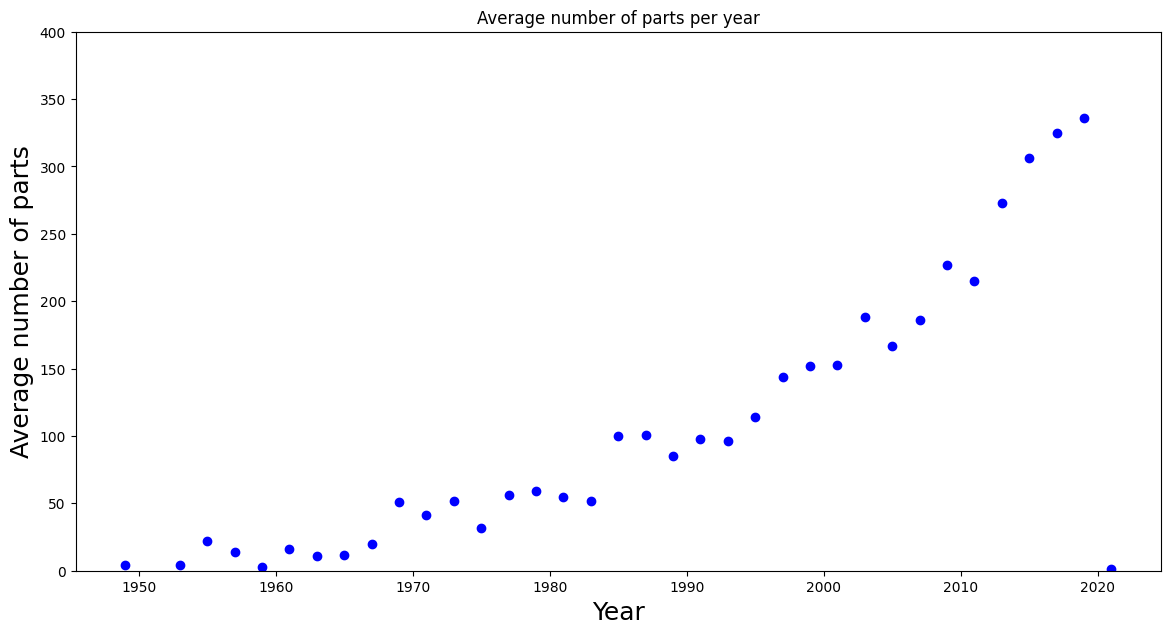

In [103]:
plt.figure(figsize=(14, 7))
plt.title("Average number of parts per year")
plt.xlabel("Year", fontsize=18)
plt.ylabel("Average number of parts", fontsize=18)
plt.ylim(0, 400)
plt.scatter(avg_sets.index[::-2], avg_sets["average_parts"][::-2], color="blue")
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [105]:
largest_number_of_themes = sets_df["theme_id"].value_counts()
largest_number_of_themes

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
156      1
519      1
530      1
475      1
414      1
Name: count, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png" />

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [108]:
themes_df = pd.read_csv("./data/themes.csv")
themes_df.fillna(0, inplace=True)
themes_df.tail()

,id,name,parent_id
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0
595,709,LEGO Art,0.0


In [109]:
themes_df[themes_df.name == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,0.0
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [110]:
sets_df[sets_df.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [111]:
sets_df[sets_df.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [112]:
set_theme_count = sets_df["theme_id"].value_counts()

In [113]:
set_theme_count = pd.DataFrame({"id": set_theme_count.index, "set_count": set_theme_count.values})
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,156,1
567,519,1
568,530,1
569,475,1


In [114]:
merged_df = pd.merge(set_theme_count, themes_df, on="id")
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,0.0
1,501,656,Gear,0.0
2,494,398,Friends,0.0
3,435,356,Ninjago,0.0
4,503,329,Key Chain,501.0
...,...,...,...,...
566,156,1,Mini,155.0
567,519,1,NXT,518.0
568,530,1,Control Lab,529.0
569,475,1,Western,0.0


### Plot on a bar

<BarContainer object of 10 artists>

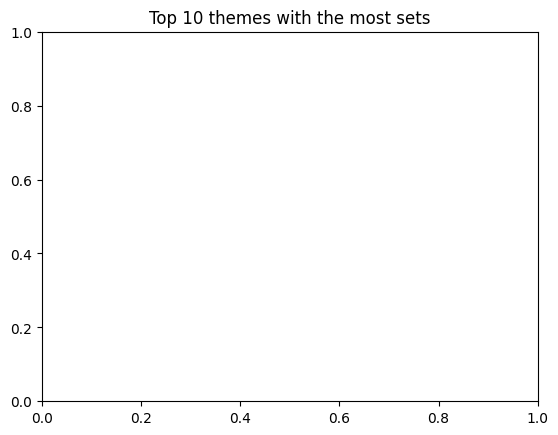

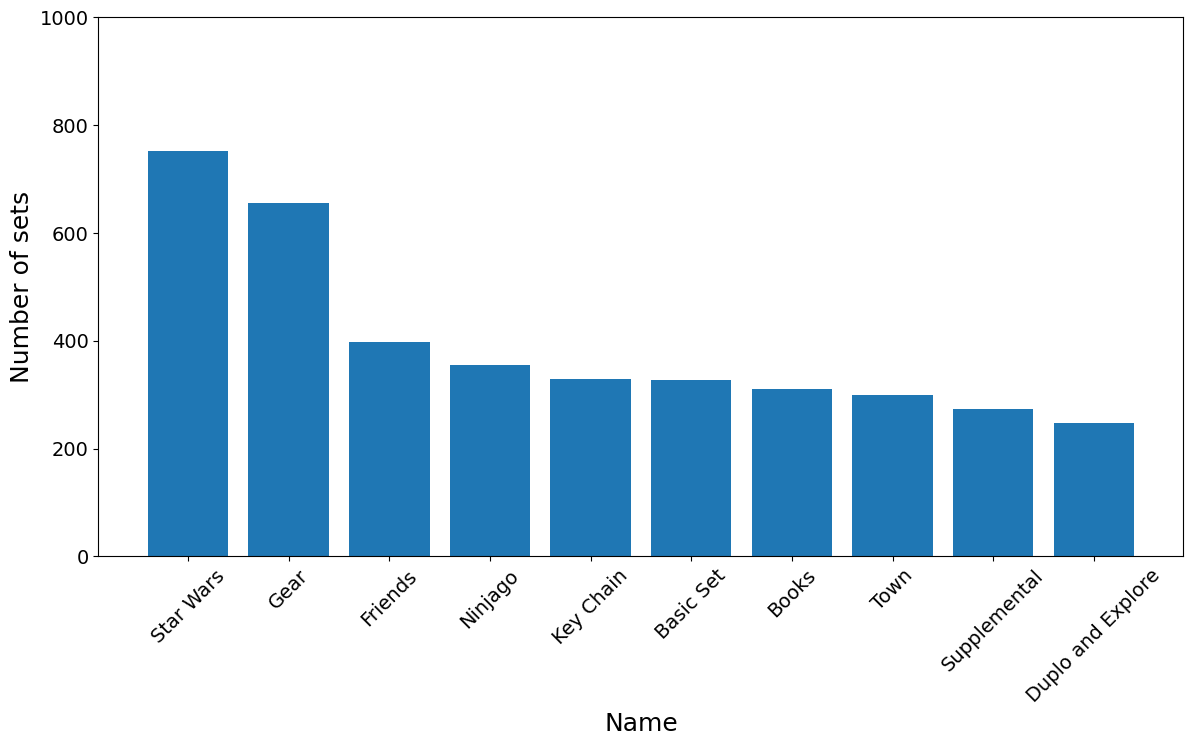

In [119]:
plt.title("Top 10 themes with the most sets")
plt.figure(figsize=(14, 7))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Name", fontsize=18)
plt.ylabel("Number of sets", fontsize=18)
plt.ylim(0, 1000)
plt.bar(merged_df["name"][:10], merged_df["set_count"][:10])
# plt.legend("Number of sets", fontsize=18)
# plt.show()

## Learning Points & Summary
### In this lesson we looked at how to:

use HTML Markdown in Notebooks, such as section headings # and how to embed images with the <img> tag.

combine the groupby() and count() functions to aggregate data

use the .value_counts() function

slice DataFrames using the square bracket notation e.g., df[:-2] or df[:10]

use the .agg() function to run an operation on a particular column

rename() columns of DataFrames

create a line chart with two separate axes to visualise data that have different scales.

create a scatter plot in Matplotlib

work with tables in a relational database by using primary and foreign keys

.merge() DataFrames along a particular column

create a bar chart with Matplotlib

